<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis**


Estimated time needed: **30** minutes

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

In this notebook, we will learn some interesting and useful data exploration techniques that can be applied to explore any geographical data.


## Objectives


*After completing this lab you will be able to:*

*   Do Data Wrangling
*   Do Data Filtering
*   Plot with <code>plotly.express</code>
*   Produce choropleth map


***


## **Setup**


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/) for managing the data.
 - [`plotly.express`](https://plotly.com/python/plotly-express/) for visualizing the data.
 - [`json`](https://docs.python.org/3/library/json.html/) for reading json file formats.



## **Installing Required Libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import pandas as pd
import plotly.express as px
import datetime
import requests
import json

## **Reading and understanding our data**


The dataset in this lab is <a href="https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000101">Monthly average retail prices for gasoline and fuel oil, by geography</a>  . It is available through Statistics Canada and includes monthly average gasoline price (Cents per Litre), of major Canadian Cities, starting from 1979 until recent.


Another dataset, <a href="https://thomson.carto.com/tables/canada_provinces/public/map">canada_provinces.geojson</a>, contains the mapping information of all Canadian Provinces. It will be used in our analysis to produce a choropleth map.


Let's read the data into *pandas* dataframe and look at the first 5 rows using the `head()` method.


In [3]:
gasoline = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/18100001.csv")
gasoline.head()

,REF_DATE,GEO,DGUID,Type of fuel,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,Jan-79,"St. John's, Newfoundland and Labrador",2011S0503001,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735046,2.1,26.0,NaN,NaN,t,1
1,Jan-79,"Charlottetown and Summerside, Prince Edward Is...",NaN,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735056,3.1,24.6,NaN,NaN,t,1
2,Jan-79,"Halifax, Nova Scotia",2011S0503205,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735057,4.1,23.4,NaN,NaN,t,1
3,Jan-79,"Saint John, New Brunswick",2011S0503310,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735058,5.1,23.2,NaN,NaN,t,1
4,Jan-79,"Québec, Quebec",2011S0503421,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735059,6.1,22.6,NaN,NaN,t,1


Let's find out how many entries there are in our dataset, using `shape` function.


In [4]:
gasoline.shape

# It returns a tuple representing the dimensions of the DataFrame or array.
# For a 2D DataFrame, the tuple will be (number_of_rows, number_of_columns).

(41942, 15)

Using `info` function, we will take a look at our types of data.


In [6]:
gasoline.info()

# This method prints a concise summary of the DataFrame 'gasoline'.
# It includes the index dtype and columns, non-null values for each column,
# data type of each column (e.g., int64, float64, object), and memory usage.
# This is very useful for getting a quick overview of the dataset's structure
# and identifying potential missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41942 entries, 0 to 41941
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       41942 non-null  object 
 1   GEO            41942 non-null  object 
 2   DGUID          39451 non-null  object 
 3   Type of fuel   41942 non-null  object 
 4   UOM            41942 non-null  object 
 5   UOM_ID         41942 non-null  int64  
 6   SCALAR_FACTOR  41942 non-null  object 
 7   SCALAR_ID      41942 non-null  int64  
 8   VECTOR         41942 non-null  object 
 9   COORDINATE     41942 non-null  float64
 10  VALUE          41942 non-null  float64
 11  STATUS         0 non-null      float64
 12  SYMBOL         0 non-null      float64
 13  TERMINATED     16564 non-null  object 
 14  DECIMALS       41942 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 4.8+ MB


Using `columns` method, we will print all the column names.


In [7]:
gasoline.columns

# This attribute accesses and displays the column labels of the DataFrame
# named 'gasoline'. It will return an Index object containing all the
# column names in the order they appear in the DataFrame. This is useful
# for quickly seeing what columns are available or for iterating over
# column names.

Index(['REF_DATE', 'GEO', 'DGUID', 'Type of fuel', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

Below, we will check for any missing values.


In [10]:
gasoline.isnull().sum()

# This line of code calculates the number of missing values in each column
# of the 'gasoline' DataFrame. Let's break it down:
# 1. `gasoline.isnull()`: This part first creates a boolean DataFrame of the
#    same dimensions as 'gasoline'. Each cell in this new DataFrame will
#    be `True` if the corresponding cell in 'gasoline' contains a missing
#    value (e.g., NaN, None), and `False` otherwise.
# 2. `.sum()`: This method is then called on the boolean DataFrame. When
#    `.sum()` is applied to a boolean Series or DataFrame, it treats `True`
#    values as 1 and `False` values as 0. By default, `sum()` operates
#    column-wise (i.e., axis=0). Therefore, for each column, it sums up
#    all the `True` values, effectively giving a count of missing values
#    per column. The result is a pandas Series where the index is the
#    column names from 'gasoline' and the values are the counts of
#    missing entries in those columns.

,0
REF_DATE,0
GEO,0
DGUID,2491
Type of fuel,0
UOM,0
UOM_ID,0
SCALAR_FACTOR,0
SCALAR_ID,0
VECTOR,0
COORDINATE,0


## **Data Wrangling**
### Selecting and renaming the columns of interest


Below, we are filtering our data, by selecting only the relevant columns. Also, we are using the `rename()` method to change the name of the columns.


In [11]:
data = (gasoline[['REF_DATE','GEO','Type of fuel','VALUE']]).rename(columns={"REF_DATE" : "DATE", "Type of fuel" : "TYPE"})

# This line performs two main operations on the 'gasoline' DataFrame and
# assigns the result to a new DataFrame called 'data'.
# 1. `gasoline[['REF_DATE','GEO','Type of fuel','VALUE']]`: This part selects
#    a subset of columns from the 'gasoline' DataFrame. Specifically, it
#    creates a new DataFrame containing only the 'REF_DATE', 'GEO',
#    'Type of fuel', and 'VALUE' columns.
# 2. `.rename(columns={"REF_DATE" : "DATE", "Type of fuel" : "TYPE"})`: This
#    method is then chained to the result of the column selection. It renames
#    two of the selected columns: 'REF_DATE' is renamed to 'DATE', and
#    'Type of fuel' is renamed to 'TYPE'. The other selected columns ('GEO'
#    and 'VALUE') retain their original names.

data.head()


,DATE,GEO,TYPE,VALUE
0,Jan-79,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0
1,Jan-79,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6
2,Jan-79,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4
3,Jan-79,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2
4,Jan-79,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6


### Splitting the columns


The `str.split()` function splits the string records, by a 'comma', with `n=1` slplit, and <code>Expend=True</code> , returns a dataframe. Below, we are splitting 'GEO' into 'City' and 'Province'.


In [13]:
data[['City', 'Province']] = data['GEO'].str.split(',', n=1, expand=True)

# This line processes the 'GEO' column in the 'data' DataFrame to extract
# city and province information and store them in two new columns,
# 'City' and 'Province'. Let's break down the right-hand side:
# 1. `data['GEO']`: Selects the 'GEO' column, which is expected to contain
#    strings where city and province are separated by a comma.
# 2. `.str`: This accessor is used to apply string methods to each element
#    in the 'GEO' Series.
# 3. `.split(',', n=1, expand=True)`: This method splits each string in the
#    'GEO' column:
#    - `','`: The delimiter used for splitting is a comma.
#    - `n=1`: Specifies that each string should be split at most once
#      (i.e., at the first occurrence of the comma). This is useful if
#      there might be multiple commas, but only the first one separates
#      the city from the province.
#    - `expand=True`: This argument ensures that the split parts are
#      returned as separate columns in a new DataFrame. If a split results
#      in two parts, this new DataFrame will have two columns.
# The resulting two columns (the first part of the split and the second part)
# are then assigned to two new columns, 'City' and 'Province', respectively,
# in the original 'data' DataFrame. If a string in 'GEO' doesn't contain
# a comma, the 'City' column will get the original string, and 'Province'
# will likely be `None` or `NaN` for that row.

data.head()

,DATE,GEO,TYPE,VALUE,City,Province
0,Jan-79,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador
1,Jan-79,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island
2,Jan-79,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia
3,Jan-79,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick
4,Jan-79,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec


### Changing to *datetime* format


If we scroll up to our `gasoline.info()` section, we can find that  'REF_DATE' is an object type. To be able to filter by day, month, or year, we need to change the format from object type to *datetime*. Pandas function `to_datetime()` transforms to date time format. Also, we need to specify the format of *datetime* that we need. In our case, `format='%b-%y'` means that it will split into the name of a month and year. `str.slice(stop=3)` splits and outputs the first 3 letters of a month. For more information on how to transform to *datetime*, please visit [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) pandas documentation. Also, [this](https://strftime.org) web page contains more information on *datetime* formats.


In [15]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%b-%y')

# This line converts the 'DATE' column in the 'data' DataFrame to datetime
# objects.
# `pd.to_datetime` is a pandas function that parses strings or other inputs
# into datetime objects.
# `data['DATE']` specifies the column to be converted.
# `format='%b-%y'` tells the function the expected format of the date strings
# in the 'DATE' column.
#   `%b` stands for the abbreviated month name (e.g., 'Jan', 'Feb').
#   `%y` stands for the year as a two-digit number (e.g., '99', '00', '21').
# The original 'DATE' column is overwritten with these new datetime objects.

data['Month'] = data['DATE'].dt.month_name().str.slice(stop=3)

# This line creates a new column named 'Month' in the 'data' DataFrame.
# `data['DATE'].dt` accesses the datetime-like properties of the 'DATE' column
# (which now contains datetime objects).
# `.month_name()` extracts the full name of the month for each date (e.g.,
# 'January', 'February').
# `.str.slice(stop=3)` then takes these full month names (which are strings)
# and extracts the first three characters (e.g., 'Jan', 'Feb').
# This effectively gives an abbreviated month name in the new 'Month' column.

data['Year'] = data['DATE'].dt.year

# This line creates a new column named 'Year' in the 'data' DataFrame.
# `data['DATE'].dt.year` accesses the 'DATE' column (containing datetime
# objects) and extracts the year component from each datetime value.
# The result is a Series of integer values representing the year, which is
# then assigned to the new 'Year' column.

data.head()

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
0,1979-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador,Jan,1979
1,1979-01-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island,Jan,1979
2,1979-01-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia,Jan,1979
3,1979-01-01,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick,Jan,1979
4,1979-01-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec,Jan,1979


The `describe()` function provides statistical information about the numeric variables. Since we only have the 'VALUE' variable that we want statistical information on, we will filter it by `data.VALUE.describe()` function.


In [16]:
data.VALUE.describe()

# This line accesses the 'VALUE' column of the 'data' DataFrame using
# attribute-style access (`data.VALUE`).
# It then calls the `.describe()` method on this column (which is a pandas
# Series). The `.describe()` method generates descriptive statistics.
# If 'VALUE' contains numerical data, it will output count, mean, std (standard
# deviation), min, max, and quartile values. If 'VALUE' contains non-numerical
# data (like strings or dates), the output will be different (e.g., count,
# unique, top, freq).

# can also use  data['VALUE'].describe()

# This comment correctly indicates that dictionary-style access (`data['VALUE']`)
# is an alternative and often more robust way to select the 'VALUE' column,
# especially if the column name has spaces or clashes with DataFrame methods.
# The `.describe()` method would then be applied in the same way.

,VALUE
count,41942.000000
mean,84.784858
std,31.492697
min,18.300000
25%,58.200000
50%,79.200000
75%,110.900000
max,191.600000


Now, it is useful to know what is inside our categorical variables. We will use `unique().tolist()` functions to print out all of our 'GEO' colunm.


In [18]:
data.GEO.unique().tolist()

# This line of code retrieves all unique values from the 'GEO' column of the
# 'data' DataFrame and converts them into a Python list.
# Let's break it down:
# 1. `data.GEO`: This part accesses the 'GEO' column of the DataFrame 'data'
#    using attribute-style access.
# 2. `.unique()`: This method is called on the 'GEO' Series (column). It
#    returns a NumPy array containing only the unique elements from that
#    column. The order of the unique items is generally the order of their
#    first appearance in the original Series.
# 3. `.tolist()`: This method is then called on the NumPy array of unique
#    values. It converts this array into a standard Python list.
# The final result is a Python list of the unique strings found in the
# 'GEO' column.

# can also use  data['GEO'].unique().tolist()
# This comment correctly points out an alternative and often preferred way
# to access the 'GEO' column using dictionary-like item access
# (`data['GEO']`). This method is more robust, especially if column names
# contain spaces, special characters, or conflict with DataFrame methods.
# The rest of the chain (`.unique().tolist()`) would work identically.

["St. John's, Newfoundland and Labrador",
 'Charlottetown and Summerside, Prince Edward Island',
 'Halifax, Nova Scotia',
 'Saint John, New Brunswick',
 'Québec, Quebec',
 'Montréal, Quebec',
 'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
 'Toronto, Ontario',
 'Thunder Bay, Ontario',
 'Winnipeg, Manitoba',
 'Regina, Saskatchewan',
 'Saskatoon, Saskatchewan',
 'Edmonton, Alberta',
 'Calgary, Alberta',
 'Vancouver, British Columbia',
 'Victoria, British Columbia',
 'Whitehorse, Yukon',
 'Yellowknife, Northwest Territories']

## Exercise 1


In this exercise, print out all categories in 'TYPE' column.


In [21]:
# Enter your code and run the cell

data.TYPE.unique().tolist()

# This line of code extracts all the unique values from the 'TYPE' column
# within the 'data' DataFrame and then converts these unique values into a
# standard Python list.
# Let's break it down:
# 1. `data.TYPE`: This part accesses the 'TYPE' column from the 'data'
#    DataFrame using attribute-style access. It assumes 'TYPE' is a valid
#    column name that doesn't conflict with DataFrame methods or contain
#    spaces/special characters.
# 2. `.unique()`: This method is called on the 'TYPE' Series (the column).
#    It returns a NumPy array containing only the distinct values present
#    in that column. The order of elements in the returned array usually
#    corresponds to the order of first appearance in the original Series.
# 3. `.tolist()`: Finally, this method is called on the NumPy array of unique
#    values. It converts this array into a Python list.
# The overall result is a list of the unique entries found in 'data.TYPE'.

['Regular unleaded gasoline at full service filling stations',
 'Regular unleaded gasoline at self service filling stations',
 'Premium unleaded gasoline at full service filling stations',
 'Premium unleaded gasoline at self service filling stations',
 'Diesel fuel at full service filling stations',
 'Household heating fuel',
 'Diesel fuel at self service filling stations']

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
data.TYPE.unique().tolist()
</code>
</details>


## **Data Filtering**


This section will introduce you to some of the most common filtering techniques when working with pandas dataframes.


### Filtering with logical operators


We can use the logical operators on column values to filter rows. First, we  specify the name of our data, then, square brackets to select the name of the column, double 'equal' sign, '==' to select the name of a row group, in single or double quotation marks. If we want to exclude some entries (e.g. some locations), we would use the 'equal' and 'exclamation point' signs together, '=!'. We can also use '</>', '<=/>=' signs to select numeric information.

Let's select the Calgary, Alberta data to see all the information.


In [22]:
calgary = data[data['GEO'] == 'Calgary, Alberta']

# This line creates a new DataFrame named 'calgary' by filtering the
# original 'data' DataFrame.
# 1. `data['GEO'] == 'Calgary, Alberta'`: This part first accesses the 'GEO'
#    column of the 'data' DataFrame. It then compares each value in this
#    column to the string 'Calgary, Alberta'. This comparison results in a
#    boolean Series (a sequence of True/False values) of the same length
#    as the 'data' DataFrame. Each element in this Series is `True` if the
#    corresponding 'GEO' value is 'Calgary, Alberta', and `False` otherwise.
# 2. `data[...]`: The boolean Series generated above is then used as an index
#    for the 'data' DataFrame. This operation, known as boolean indexing,
#    selects only those rows from 'data' where the corresponding value in the
#    boolean Series is `True`.
# The resulting subset of 'data' (containing only rows related to Calgary,
# Alberta) is assigned to the new DataFrame 'calgary'.

calgary

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
13,1979-01-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.7,Calgary,Alberta,Jan,1979
28,1979-02-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.9,Calgary,Alberta,Feb,1979
43,1979-03-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.9,Calgary,Alberta,Mar,1979
58,1979-04-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,19.1,Calgary,Alberta,Apr,1979
73,1979-05-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,19.2,Calgary,Alberta,May,1979
...,...,...,...,...,...,...,...,...
41855,2021-09-01,"Calgary, Alberta",Premium unleaded gasoline at self service fill...,156.6,Calgary,Alberta,Sep,2021
41856,2021-09-01,"Calgary, Alberta",Diesel fuel at self service filling stations,125.1,Calgary,Alberta,Sep,2021
41923,2021-10-01,"Calgary, Alberta",Regular unleaded gasoline at self service fill...,140.8,Calgary,Alberta,Oct,2021
41924,2021-10-01,"Calgary, Alberta",Premium unleaded gasoline at self service fill...,164.4,Calgary,Alberta,Oct,2021


Now, let's select 2000 year.


In [23]:
sel_years = data[data['Year'] ==  2000]
# This line creates a new DataFrame called 'sel_years'. It filters the
# original 'data' DataFrame to include only rows where the value in the
# 'Year' column is equal to the integer 2000.
# 1. `data['Year'] == 2000`: This expression compares each entry in the
#    'Year' column of the 'data' DataFrame with the value 2000. It
#    produces a boolean Series (True where the year is 2000, False
#    otherwise).
# 2. `data[...]`: The boolean Series is then used to index the 'data'
#    DataFrame, selecting only the rows for which the condition is True.
# The resulting DataFrame, containing data only for the year 2000, is
# assigned to 'sel_years'.

sel_years

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
16168,2000-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,78.0,St. John's,Newfoundland and Labrador,Jan,2000
16169,2000-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at self service fill...,74.9,St. John's,Newfoundland and Labrador,Jan,2000
16170,2000-01-01,"St. John's, Newfoundland and Labrador",Premium unleaded gasoline at full service fill...,84.5,St. John's,Newfoundland and Labrador,Jan,2000
16171,2000-01-01,"St. John's, Newfoundland and Labrador",Premium unleaded gasoline at self service fill...,81.3,St. John's,Newfoundland and Labrador,Jan,2000
16172,2000-01-01,"St. John's, Newfoundland and Labrador",Diesel fuel at full service filling stations,69.2,St. John's,Newfoundland and Labrador,Jan,2000
...,...,...,...,...,...,...,...,...
17579,2000-12-01,"Yellowknife, Northwest Territories",Premium unleaded gasoline at full service fill...,92.6,Yellowknife,Northwest Territories,Dec,2000
17580,2000-12-01,"Yellowknife, Northwest Territories",Premium unleaded gasoline at self service fill...,95.4,Yellowknife,Northwest Territories,Dec,2000
17581,2000-12-01,"Yellowknife, Northwest Territories",Diesel fuel at full service filling stations,81.9,Yellowknife,Northwest Territories,Dec,2000
17582,2000-12-01,"Yellowknife, Northwest Territories",Diesel fuel at self service filling stations,78.9,Yellowknife,Northwest Territories,Dec,2000


### Filtering by multiple conditions


There are many alternative ways to perform filtering in pandas. We can also use '|' ('or') and '&' (and) to select multiple columns and rows.


For example, let us select Toronto and Edmonton locations.


In [24]:
mult_loc = data[(data['GEO'] == "Toronto, Ontario") | (data['GEO'] == "Edmonton, Alberta")]

# This line creates a new DataFrame named 'mult_loc' by filtering the
# 'data' DataFrame to include rows where the 'GEO' column matches one of
# two specified locations.
# 1. `(data['GEO'] == "Toronto, Ontario")`: This part creates a boolean Series
#    that is `True` for rows where 'GEO' is "Toronto, Ontario", and `False`
#    otherwise.
# 2. `(data['GEO'] == "Edmonton, Alberta")`: Similarly, this creates a
#    boolean Series that is `True` for rows where 'GEO' is "Edmonton,
#    Alberta".
# 3. `|`: The pipe symbol `|` acts as a logical OR operator. It combines the
#    two boolean Series from steps 1 and 2. The resulting Series is `True`
#    if the 'GEO' value is *either* "Toronto, Ontario" *or* "Edmonton,
#    Alberta". Parentheses ensure correct operator precedence.
# 4. `data[...]`: This combined boolean Series is then used to filter the
#    'data' DataFrame, selecting only the rows that satisfy at least one of
#    the conditions.
# The resulting DataFrame, containing data for both Toronto and Edmonton, is
# assigned to 'mult_loc'.

mult_loc

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
7,1979-01-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.0,Toronto,Ontario,Jan,1979
12,1979-01-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.3,Edmonton,Alberta,Jan,1979
22,1979-02-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.2,Toronto,Ontario,Feb,1979
27,1979-02-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.5,Edmonton,Alberta,Feb,1979
37,1979-03-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.2,Toronto,Ontario,Mar,1979
...,...,...,...,...,...,...,...,...
41903,2021-10-01,"Toronto, Ontario",Diesel fuel at self service filling stations,141.3,Toronto,Ontario,Oct,2021
41904,2021-10-01,"Toronto, Ontario",Household heating fuel,148.0,Toronto,Ontario,Oct,2021
41920,2021-10-01,"Edmonton, Alberta",Regular unleaded gasoline at self service fill...,138.3,Edmonton,Alberta,Oct,2021
41921,2021-10-01,"Edmonton, Alberta",Premium unleaded gasoline at self service fill...,159.6,Edmonton,Alberta,Oct,2021


Alternatively, we can use `isin` method to select multiple locations.


In [25]:
cities = ['Calgary', 'Toronto', 'Edmonton']

# This line creates a Python list named 'cities'.
# The list contains three string elements: 'Calgary', 'Toronto', and
# 'Edmonton'. This list will be used later for filtering.

CTE = data[data.City.isin(cities)]

# This line creates a new DataFrame named 'CTE' by filtering the 'data'
# DataFrame.
# 1. `data.City`: This accesses the 'City' column of the 'data' DataFrame
#    using attribute-style access.
# 2. `.isin(cities)`: This method is called on the 'City' Series. It checks
#    for each city in the 'data.City' column whether it is present in the
#    'cities' list (defined above). It returns a boolean Series (True if
#    the city is in the list, False otherwise).
# 3. `data[...]`: This boolean Series is then used to filter the 'data'
#    DataFrame, selecting only those rows where the 'City' is one of the
#    cities specified in the 'cities' list.
# The resulting DataFrame, containing data only for Calgary, Toronto, and
# Edmonton, is assigned to 'CTE'.

CTE

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
7,1979-01-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.0,Toronto,Ontario,Jan,1979
12,1979-01-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.3,Edmonton,Alberta,Jan,1979
13,1979-01-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.7,Calgary,Alberta,Jan,1979
22,1979-02-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.2,Toronto,Ontario,Feb,1979
27,1979-02-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.5,Edmonton,Alberta,Feb,1979
...,...,...,...,...,...,...,...,...
41921,2021-10-01,"Edmonton, Alberta",Premium unleaded gasoline at self service fill...,159.6,Edmonton,Alberta,Oct,2021
41922,2021-10-01,"Edmonton, Alberta",Diesel fuel at self service filling stations,134.7,Edmonton,Alberta,Oct,2021
41923,2021-10-01,"Calgary, Alberta",Regular unleaded gasoline at self service fill...,140.8,Calgary,Alberta,Oct,2021
41924,2021-10-01,"Calgary, Alberta",Premium unleaded gasoline at self service fill...,164.4,Calgary,Alberta,Oct,2021


## Exercise 2 a


In this exercise, please use the examples shown above, to select the data that shows the price of the 'household heating fuel', in Vancouver, in 1990.


In [29]:
# Enter your code below and run the cell

exercise2a = data[( data['Year'] == 1990) & (data['TYPE'] == "Household heating fuel") & (data['City']=='Vancouver')]

# This line creates a new DataFrame named 'exercise2a'. It filters the
# 'data' DataFrame to include only rows that satisfy three specific
# conditions simultaneously.
# 1. `( data['Year'] == 1990)`: This condition checks if the 'Year' column
#    is equal to 1990. It produces a boolean Series.
# 2. `(data['TYPE'] == "Household heating fuel")`: This condition checks if
#    the 'TYPE' column is equal to the string "Household heating fuel".
#    It also produces a boolean Series.
# 3. `(data['City']=='Vancouver')`: This condition checks if the 'City'
#    column is equal to the string 'Vancouver'. It produces a boolean Series.
# 4. `&`: The ampersand `&` symbol acts as a logical AND operator. It
#    combines the three boolean Series from the conditions above. A row
#    is selected only if all three conditions are True for that row.
#    Parentheses around each condition ensure correct operator precedence.
# 5. `data[...]`: This combined boolean Series is used to filter the 'data'
#    DataFrame.
# The resulting DataFrame, containing data for household heating fuel in
# Vancouver for the year 1990, is assigned to 'exercise2a'.

exercise2a

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
2192,1990-01-01,"Vancouver, British Columbia",Household heating fuel,32.4,Vancouver,British Columbia,Jan,1990
2304,1990-02-01,"Vancouver, British Columbia",Household heating fuel,33.7,Vancouver,British Columbia,Feb,1990
2416,1990-03-01,"Vancouver, British Columbia",Household heating fuel,34.0,Vancouver,British Columbia,Mar,1990
2528,1990-04-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Apr,1990
2640,1990-05-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,May,1990
2752,1990-06-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Jun,1990
2864,1990-07-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Jul,1990
2976,1990-08-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Aug,1990
3088,1990-09-01,"Vancouver, British Columbia",Household heating fuel,36.7,Vancouver,British Columbia,Sep,1990
3200,1990-10-01,"Vancouver, British Columbia",Household heating fuel,41.8,Vancouver,British Columbia,Oct,1990


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
exercise2a = data[( data['Year'] ==  1990) & (data['TYPE'] == "Household heating fuel") & (data['City']=='Vancouver')]
exercise2a
</code>
</details>


## Exercise 2 b


In this exercise, please select the data that shows the price of the 'household heating fuel', in Vancouver, in the years of 1979 and 2021.


In [35]:
# Enter your code below and run the cell

exercise2b = data[( data['Year'] <= 1979) | ( data['Year'] == 2021) & (data['TYPE'] == "Household heating fuel") & (data['City']=='Vancouver')]

# This line creates 'exercise2b' by filtering 'data' based on combined conditions.
# Due to operator precedence, the AND (&) conditions are evaluated first as a group,
# then combined with the OR (|) condition.
# 1. `( data['Year'] == 2021) & (data['TYPE'] == "Household heating fuel") & (data['City']=='Vancouver')`:
#    This part forms a boolean Series. It's `True` only for rows where 'Year'
#    is 2021, AND 'TYPE' is "Household heating fuel", AND 'City' is
#    'Vancouver' simultaneously.
# 2. `( data['Year'] <= 1979)`: This part forms another boolean Series, `True`
#    for rows where 'Year' is less than or equal to 1979.
# 3. `(...) | (...)`: The `|` (OR) operator then combines the results from
#    step 1 and step 2. A row is selected if EITHER the condition in step 2
#    is `True` (Year <= 1979) OR if ALL conditions in step 1 are `True`.
# 4. `data[...]`: This combined boolean Series filters 'data'.
# The result, containing rows meeting these criteria, is assigned to 'exercise2b'.

exercise2b

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
0,1979-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador,Jan,1979
1,1979-01-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island,Jan,1979
2,1979-01-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia,Jan,1979
3,1979-01-01,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick,Jan,1979
4,1979-01-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec,Jan,1979
...,...,...,...,...,...,...,...,...
41653,2021-06-01,"Vancouver, British Columbia",Household heating fuel,133.1,Vancouver,British Columbia,Jun,2021
41722,2021-07-01,"Vancouver, British Columbia",Household heating fuel,135.2,Vancouver,British Columbia,Jul,2021
41791,2021-08-01,"Vancouver, British Columbia",Household heating fuel,136.5,Vancouver,British Columbia,Aug,2021
41860,2021-09-01,"Vancouver, British Columbia",Household heating fuel,140.9,Vancouver,British Columbia,Sep,2021


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
exercise2b = data[( data['Year'] <=  1979) | ( data['Year'] ==  2021) & (data['TYPE'] == "Household heating fuel") & (data['City']=='Vancouver')]
exercise2b
</code>
</details>


<details>
<summary><strong>Hint</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
If we use '&' operator between the two years, it will return an empty data frame. This is because there was no data for the 'household heating fuel, in Vancouver, in 1979. Using 'or' operator is suitable because either one of two years that contains any information on 'household heating fuel' in Vancouver.
</code>
</details>


### Filtering using `groupby()` method


The role of `groupby()` is to analyze data by some categories. The simplest call is by a column name. For example, let’s use the 'GEO' column and `ngroups` function to calculate the number of groups (cities, provinces) in 'GEO' column.


In [34]:
geo = data.groupby('GEO')

# This line performs a groupby operation on the 'data' DataFrame.
# `data.groupby('GEO')` groups the rows of the DataFrame based on the
# unique values present in the 'GEO' column.
# The result is not a DataFrame itself, but a DataFrameGroupBy object. This
# object contains information about the groups and can be used for further
# aggregate calculations or transformations on each group.
# This DataFrameGroupBy object is assigned to the variable 'geo'.

geo.ngroups

# This line accesses the `ngroups` attribute of the DataFrameGroupBy object
# stored in the 'geo' variable.
# The `ngroups` attribute returns an integer representing the total number of
# distinct groups that were formed by the `groupby('GEO')` operation.
# Essentially, this gives you the count of unique values in the 'GEO' column.

18

Most commonly, we use `groupby()` to split the data into groups,this will apply some function to each of the groups (e.g. mean, median, min, max, count), then combine the results into a data structure. For example, let's select the 'VALUE' column and calculate the mean of the gasoline prices per year. First, we specify the 'Year" column, following by the 'VALUE' column, and the `mean()` function.


In [36]:
group_year = data.groupby(['Year'])['VALUE'].mean()

# This line calculates the average 'VALUE' for each 'Year' in the 'data'
# DataFrame and stores the result in 'group_year'.
# 1. `data.groupby(['Year'])`: This part groups the rows of the 'data'
#    DataFrame based on the unique values found in the 'Year' column.
#    It creates a DataFrameGroupBy object.
# 2. `['VALUE']`: After grouping, this selects the 'VALUE' column from each
#    group. The subsequent aggregation will apply only to this column.
# 3. `.mean()`: This method calculates the mean (average) of the 'VALUE'
#    for each group (i.e., for each year).
# The result is a pandas Series where the index is the 'Year' and the values
# are the corresponding mean 'VALUE's. This Series is assigned to 'group_year'.

group_year

# This line, when executed in an interactive Python environment (like a
# Jupyter notebook or an IPython console), will display the contents of the
# 'group_year' Series. It will show each year and its calculated average
# 'VALUE'.

,VALUE
Year,
1979,23.604444
1980,28.068750
1981,38.002604
1982,44.701563
1983,47.904688
1984,50.442708
1985,53.899479
1986,48.405208
1987,49.758333


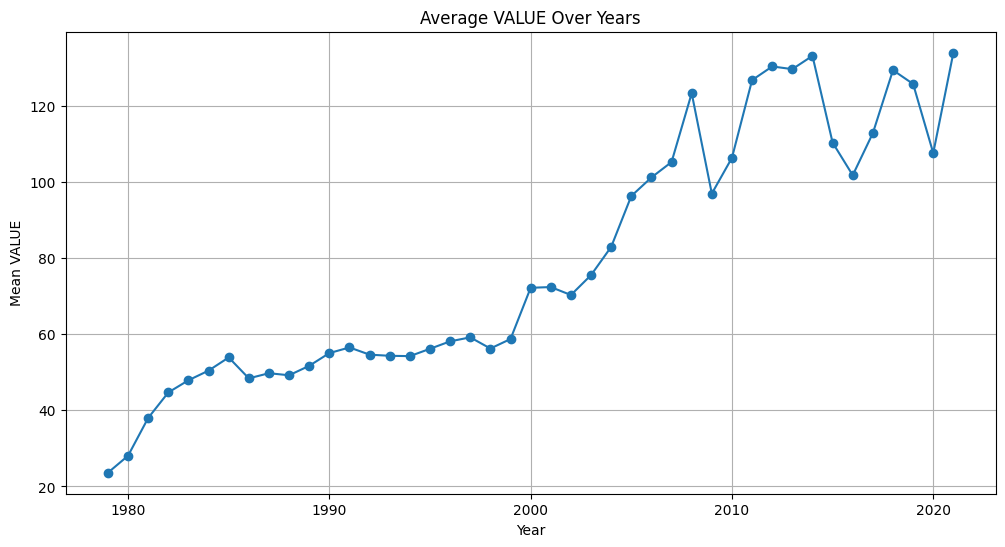

In [37]:
import matplotlib.pyplot as plt

# Create the line plot

plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
# This line creates a new figure for the plot. A figure can be thought of
# as a canvas on which one or more plots (Axes) are drawn.
# `figsize=(12, 6)` sets the width and height of the figure to 12 inches
# and 6 inches, respectively, to make the plot larger and more readable.

group_year.plot(kind='line', marker='o', linestyle='-')

# This line generates the line plot directly from the 'group_year' pandas
# Series. Pandas objects have a built-in `.plot()` method.
# `kind='line'` specifies that a line plot should be created.
# `marker='o'` instructs matplotlib to place a circle marker at each
# data point on the line (corresponding to each year's average value).
# `linestyle='-'` ensures that a solid line connects the markers.
# Existing comment: 'kind="line"' specifies a line plot.
# Existing comment: 'marker="o"' adds a circle marker for each data point (year).
# Existing comment: 'linestyle="-"' specifies a solid line.

plt.title('Average VALUE Over Years')

# This line sets the title of the plot to 'Average VALUE Over Years'.
# The title provides a general description of what the plot represents.

plt.xlabel('Year')

# This line sets the label for the x-axis of the plot to 'Year'.
# The x-axis in this case represents the years from the 'group_year' Series.

plt.ylabel('Mean VALUE')

# This line sets the label for the y-axis of the plot to 'Mean VALUE'.
# The y-axis represents the calculated mean of the 'VALUE' for each year.

plt.grid(True) # Adds a grid for easier reading of values

# This line adds a grid to the plot. The grid consists of horizontal and
# vertical lines aligned with the ticks on the axes, making it easier
# to visually estimate the values of data points.

plt.show()
# This line displays the plot that has been configured by the preceding
# commands. In many environments (like Jupyter notebooks with %matplotlib
# inline), plots might appear automatically, but `plt.show()` ensures it's
# rendered and is good practice for scripts.

## Exercise 3 a


In the cell below, please use `groupby()` method to group by the maximum value of gasoline prices, for each month.


In [49]:
# Enter your code below and run the cell

exercise3a = data.groupby(['Month'])['VALUE'].max()

# This line calculates the maximum 'VALUE' for each 'Month' in the 'data'
# DataFrame and assigns the result to the variable 'exercise3a'.
# 1. `data.groupby(['Month'])`: This part groups the rows of the 'data'
#    DataFrame based on the unique values found in the 'Month' column.
#    It creates a DataFrameGroupBy object.
# 2. `['VALUE']`: After grouping, this selects the 'VALUE' column from each
#    group. The subsequent aggregation will apply only to this column.
# 3. `.max()`: This aggregation function then computes the maximum value
#    within the 'VALUE' column for each 'Month' group.
# The result is a pandas Series, where the index is the 'Month' and the
# values are the corresponding maximum 'VALUE's. This Series is assigned
# to 'exercise3a'.

exercise3a

,VALUE
Month,
Apr,187.8
Aug,188.3
Dec,158.5
Feb,168.0
Jan,162.0
Jul,191.6
Jun,183.2
Mar,171.8
May,189.3


Text(0.5, 1.0, 'Maximum VALUE by Month')

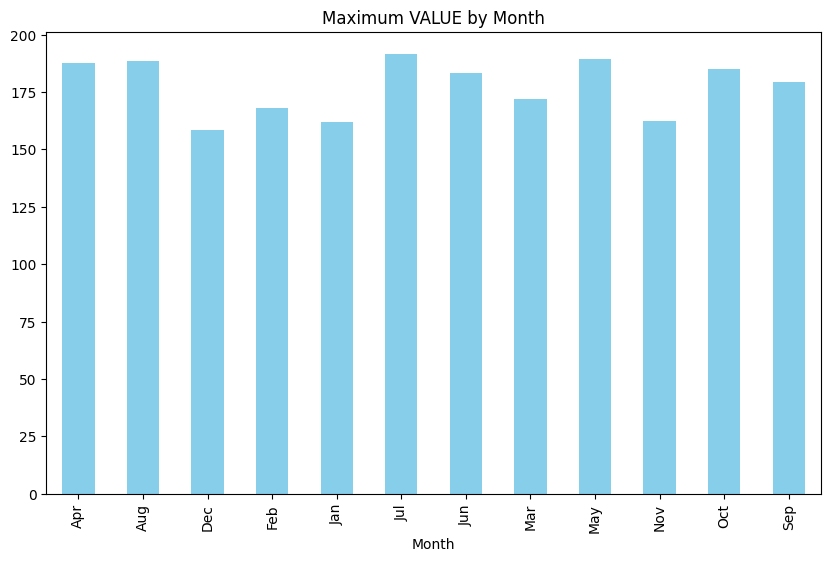

In [51]:
# Create the bar chart
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
# This line creates a new Matplotlib figure, which serves as a container for
# the plot.
# `figsize=(10, 6)` sets the width and height of the figure to 10 inches
# and 6 inches, respectively, making the plot larger for better visibility.

exercise3a.plot(kind='bar', color='skyblue')
# This line generates a bar chart directly from the 'exercise3a' pandas Series.
# Pandas Series and DataFrames have a built-in `.plot()` method.
# `kind='bar'` specifies that a bar chart should be created. Each bar will
# correspond to an entry in the 'exercise3a' Series (months, in this case).
# `color='skyblue'` sets the color of all bars in the chart to sky blue.
# Existing comment: 'kind="bar"' specifies a bar chart.
# Existing comment: 'color="skyblue"' sets the color of the bars (optional).

# Add titles and labels for clarity

plt.title('Maximum VALUE by Month')
# This line sets the title of the plot to 'Maximum VALUE by Month'.
# The title provides a concise

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
exercise3a = data.groupby(['Month'])['VALUE'].max()
</code>
</details>


## Exercise 3 b


In the cell below, please use `groupby()` method to group by the median value of gasoline prices, for each year and each city.


In [53]:
# Enter your code below and run the cell

exercise3b = data.groupby(['Year', 'City'])['VALUE'].median()
# This line calculates the median 'VALUE' for each unique combination of 'Year'
# and 'City' present in the 'data' DataFrame.
# 1. `data.groupby(['Year', 'City'])`: This groups the DataFrame 'data' by
#    both the 'Year' and 'City' columns.
# 2. `['VALUE']`: From these groups, it selects the 'VALUE' column.
# 3. `.median()`: It then computes the median of the 'VALUE' for each
#    ('Year', 'City') group.
# The result, a Series with a MultiIndex (Year, City), is stored in 'exercise3b'.

exercise3b

Year  City                        
1979  Calgary                          19.15
      Charlottetown and Summerside     25.45
      Edmonton                         18.70
      Halifax                          24.00
      Montréal                         23.25
                                       ...  
2021  Vancouver                       151.10
      Victoria                        148.80
      Whitehorse                      142.25
      Winnipeg                        127.70
      Yellowknife                     138.65
Name: VALUE, Length: 751, dtype: float64

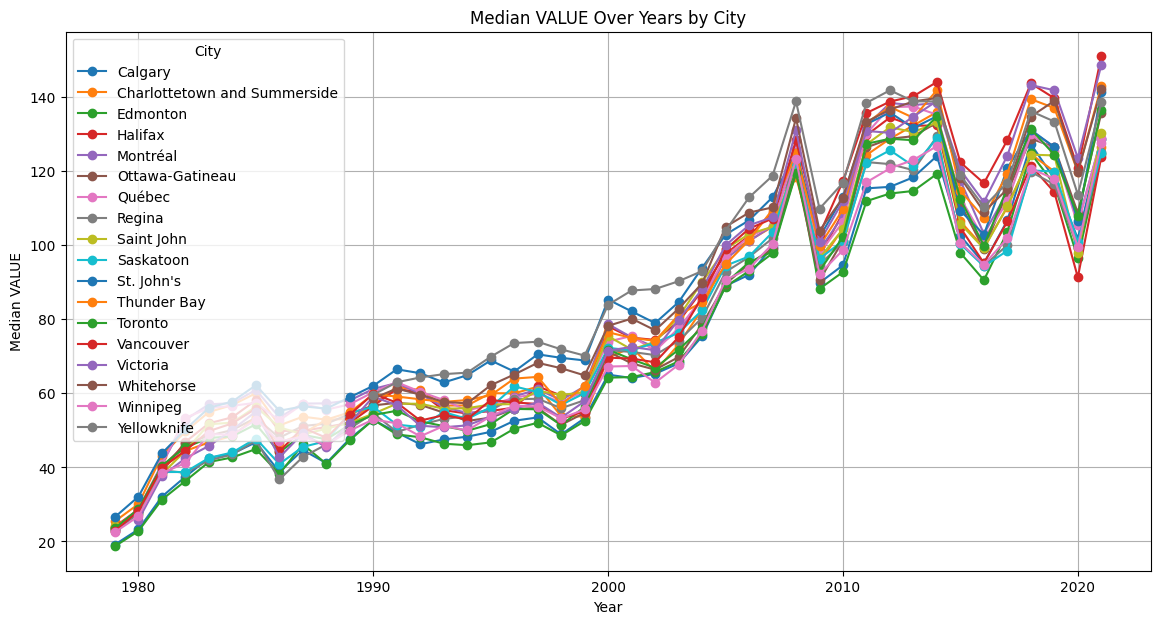

In [59]:
# Unstack the 'City' level to make cities into separate columns.
# This reshapes the data so that 'Year' is the index and each 'City'
# becomes a column, which is ideal for plotting multiple time series.
try:
# Begins a 'try' block, which allows the program to attempt code that might
# raise an error and handle it gracefully if one occurs.

    exercise3b_unstacked = exercise3b.unstack(level='City')
    # This line attempts to reshape the `exercise3b` Series. `exercise3b` is
    # assumed to have a MultiIndex (e.g., 'Year' and 'City').
    # The `.unstack(level='City')` method pivots the 'City' level of this
    # MultiIndex to become column headers in a new DataFrame. The remaining
    # index level(s) (e.g., 'Year') will form the index of this new DataFrame.
    # The values in the DataFrame will be the median 'VALUE's.

    # Alternatively, if 'City' is the second level (index 1) of the MultiIndex:
    # exercise3b_unstacked = exercise3b.unstack(1)
    # This comment suggests an alternative way to specify the level to unstack
    # by using its numerical position (1 for the second level) instead of its name.

    # Create the line plot
    plt.figure(figsize=(14, 7)) # Set the figure size for better readability
    # This command creates a new Matplotlib figure, which acts as a canvas
    # for the plot.
    # `figsize=(14, 7)` specifies the width (14 inches) and height (7 inches)
    # of the figure, making the plot larger and potentially easier to read.

    # Plot the unstacked DataFrame. Pandas will automatically create a line
    # for each column (each city) against the index (Year).
    # Using ax=plt.gca() ensures it plots on the current figure's axes.
    exercise3b_unstacked.plot(ax=plt.gca(), marker='o', linestyle='-') # Added markers for clarity
    # This plots the `exercise3b_unstacked` DataFrame. Pandas' `.plot()` method,
    # when used on a DataFrame, automatically creates a separate line for each
    # column, using the DataFrame's index for the x-axis.
    # `ax=plt.gca()` ensures that the plot is drawn on the "current Axes"
    # object of the figure created by `plt.figure()`.
    # `marker='o'` adds circular markers at each data point on the lines.
    # `linestyle='-'` ensures a solid line is used to connect the markers.

    # Add titles and labels for clarity
    plt.title('Median VALUE Over Years by City')
    # Sets the main title for the plot, providing a summary of what the
    # visualization represents.

    plt.xlabel('Year')
    # Sets the label for the x-axis, indicating that it represents the 'Year'.

    plt.ylabel('Median VALUE')
    # Sets the label for the y-axis, indicating that it represents the
    # 'Median VALUE'.

    plt.grid(True) # Add a grid for easier reading of values
    # Adds a grid to the plot background. Grid lines can make it easier to
    # estimate the values of points on the plot.

    plt.legend(title='City') # Add a legend to identify the lines for each city
    # Displays a legend on the plot. Since each line represents a different
    # city (which are columns in `exercise3b_unstacked`), the legend helps
    # identify which line corresponds to which city.
    # `title='City'` adds a title to the legend box itself.

    # Show the plot
    plt.show()
    # This command renders and displays the fully configured plot. In some
    # environments like Jupyter notebooks, plots might appear without this,
    # but it's standard practice to include it, especially in scripts.

except KeyError as e:
# This line begins an 'except' block that will execute if a 'KeyError'
# occurs within the preceding 'try' block. A KeyError might occur if, for
# instance, 'City' is not a valid name for a level in the MultiIndex of
# `exercise3b`.

    # This block handles potential errors if 'City' is not a valid level name
    # or if unstacking leads to unexpected issues.
    print(f"Error during unstacking. It's possible 'City' is not a valid index level name or data is sparse.")
    # If a KeyError occurs, this line prints an informative error message to the
    # console, suggesting potential causes.

    print(f"Original error: {e}")
    # This prints the original KeyError message, providing more specific details
    # about the error that was caught.

    print("Please inspect 'exercise3b.index.names' to confirm the level names.")
    # This offers a concrete debugging step: advising the user to check the
    # names of the levels in the MultiIndex of `exercise3b`.

    print("If data is sparse, unstacking might result in many NaNs. Consider using fill_value if appropriate.")
    # This suggests another potential issue related to sparse data (many missing
    # combinations of Year/City) and a possible solution using the `fill_value`
    # parameter in the `unstack` method.

    # For example: exercise3b_unstacked = exercise3b.unstack(level='City', fill_value=0)
    # This comment provides a specific example of how `fill_value` might be
    # used, cautioning that the choice of fill value is context-dependent.

    # This would fill missing combinations with 0, but choose fill_value carefully.
    # This sub-comment further emphasizes the importance of selecting an
    # appropriate fill value if that approach is taken.

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
exercise3b = data.groupby(['Year', 'City'])['VALUE'].median()
</code>
</details>


<details>
<summary><strong>Hint</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
    
We can also reset the index of the new data output, by using `reset_index()`, and round up the output values to 2 decimal places.

exercise3b = data.groupby(['Year', 'City'])['VALUE'].median().reset_index(name ='Value').round(2)

</code>
</details>


## **Visualizing the data with *pandas* plotly.express**


The *plotly.express* library (usually imported as px) contains functions that can create entire figures at once. *plotly.express* is a built-in part of the *plotly* library, and makes creation of most common figures very easy. For more information on *plotly.express*, please refer to [this](https://plotly.com/python/plotly-express/) documentation.


Here, we will plot the prices of gasoline in all cities during 1979 - 2021.


In [60]:
price_bycity = data.groupby(['Year', 'GEO'])['VALUE'].mean().reset_index(name ='Value').round(2)

# This line calculates the average 'VALUE' for each combination of 'Year' and
# 'GEO', then formats the result into a new DataFrame called 'price_bycity'.
# 1. `data.groupby(['Year', 'GEO'])`: This groups the 'data' DataFrame by
#    unique pairs of 'Year' and 'GEO' values.
# 2. `['VALUE']`: From these groups, it selects the 'VALUE' column.
# 3. `.mean()`: It then computes the mean (average) of 'VALUE' for each
#    ('Year', 'GEO') group. This results in a pandas Series with a
#    MultiIndex ('Year', 'GEO').
# 4. `.reset_index(name ='Value')`: This converts the resulting Series back
#    into a DataFrame. The index levels ('Year', 'GEO') become regular
#    columns, and the mean values are placed in a new column named 'Value'.
# 5. `.round(2)`: Finally, this method rounds the values in the 'Value' column
#    (and any other numeric columns if present) of the new DataFrame to two
#    decimal places.
# The resulting DataFrame is assigned to the variable 'price_bycity'.

In [61]:
fig = px.line(price_bycity
# This line begins the creation of a line plot using Plotly Express,
# which is conventionally imported as `px`. The resulting figure object
# is assigned to the variable `fig`.
# `price_bycity` is the DataFrame containing the data to be plotted.

               ,x='Year', y = "Value",
# `x='Year'` maps the 'Year' column from the `price_bycity` DataFrame to
# the x-axis of the plot.
# `y="Value"` maps the 'Value' column (which likely contains the average
# prices calculated previously) to the y-axis.

               color = "GEO", color_discrete_sequence=px.colors.qualitative.Light24)
# `color="GEO"` instructs Plotly Express to create a separate line for each
# unique value in the 'GEO' column. Each line will have a different color.
# `color_discrete_sequence=px.colors.qualitative.Light24` sets a specific
# predefined qualitative color sequence (`Light24`) for the lines, ensuring
# a diverse set of easily distinguishable colors if there are many 'GEO' values.

fig.update_traces(mode='markers+lines')
# This line updates the traces (the lines themselves) of the figure.
# `mode='markers+lines'` configures each trace to display both markers
# (e.g., dots) at each data point and lines connecting these markers.
# This can help in visualizing individual data points along the trend lines.

fig.update_layout(
# This line updates various aspects of the figure's layout, such as titles
# and axis labels, to make the plot more informative.

    title="Gasoline Price Trend per City",
# `title` sets the main title of the plot to "Gasoline Price Trend per City".

    xaxis_title="Year",
# `xaxis_title` sets the title for the x-axis to "Year".

    yaxis_title="Annual Average Price, Cents per Litre")
# `yaxis_title` sets the title for the y-axis to "Annual Average Price,
# Cents per Litre", providing units and context for the y-values.

fig.show()
# This command renders and displays the interactive Plotly Express figure.
# In environments like Jupyter notebooks, this will typically embed the plot
# in the output. In other environments, it might open in a new browser window.

Here, we will plot the average monthly prices of gasoline in Toronto for the year of 2021.


In [63]:
mon_trend = data[(data['Year'] ==  2021) & (data['GEO'] == "Toronto, Ontario")]
# This line creates a new DataFrame called 'mon_trend' by filtering the
# original 'data' DataFrame.
# It selects only those rows where the 'Year' column is equal to 2021 AND
# the 'GEO' column is equal to the string "Toronto, Ontario".
# 1. `(data['Year'] == 2021)`: Creates a boolean Series, True for rows
#    where the year is 2021.
# 2. `(data['GEO'] == "Toronto, Ontario")`: Creates a boolean Series, True for
#    rows where GEO is "Toronto, Ontario".
# 3. `&`: The logical AND operator combines these conditions, so only rows
#    satisfying both are selected.
# The resulting filtered DataFrame is assigned to 'mon_trend'.

group_month = mon_trend.groupby(['Month'])['VALUE'].mean().reset_index().sort_values(by="VALUE")
# This line processes the 'mon_trend' DataFrame to calculate the average
# 'VALUE' for each 'Month', then sorts these averages, and stores the
# result in 'group_month'.
# 1. `mon_trend.groupby(['Month'])`: Groups the 'mon_trend' DataFrame by the
#    unique values in the 'Month' column.
# 2. `['VALUE']`: Selects the 'VALUE' column from these monthly groups.
# 3. `.mean()`: Calculates the mean (average) of the 'VALUE' for each month.
#    This results in a pandas Series with 'Month' as the index.
# 4. `.reset_index()`: Converts this Series back into a DataFrame. The 'Month'
#    index becomes a regular column, and the mean values are typically in a
#    column named 'VALUE' (or the name of the original Series values).
# 5. `.sort_values(by="VALUE")`: Sorts the rows of the resulting DataFrame
#    based on the 'VALUE' column in ascending order.
# The final sorted DataFrame is assigned to 'group_month'.

In [65]:
fig = px.line(group_month,
# This line starts the creation of a line plot using Plotly Express (imported
# as `px`). The `group_month` DataFrame, which contains monthly average
# values, is used as the data source for this plot.
# The resulting figure object is assigned to the variable `fig`.

               x='Month', y = "VALUE")
# `x='Month'` maps the 'Month' column from the `group_month` DataFrame to the
# x-axis of the plot.
# `y="VALUE"` maps the 'VALUE' column (containing the average monthly prices)
# from `group_month` to the y-axis. Since there's no `color` argument,
# Plotly Express will plot a single line representing this data.

fig.update_traces(mode='markers+lines')
# This line updates the appearance of the traces (the lines/data series)
# in the figure.
# `mode='markers+lines'` configures the plot to display both markers (e.g.,
# dots) at each data point and lines connecting these markers, making it
# easier to see individual monthly values and the overall trend.

fig.update_layout(
# This function call updates various aspects of the figure's layout, such as
# titles and axis labels, to make the plot more descriptive and readable.

    title="Toronto Average Monthly Gasoline Price in 2021",
# `title` sets the main title of the plot, providing a clear summary of
# what the visualization represents.

    xaxis_title="Month",
# `xaxis_title` sets the title for the x-axis, indicating that it
# represents the 'Month'.

    yaxis_title="Monthly Price, Cents per Litre")
# `yaxis_title` sets the title for the y-axis, specifying the units and
# context (cents per litre) for the price values shown.

fig.show()
# This command renders and displays the interactive Plotly Express figure.
# In environments like Jupyter notebooks, this will typically embed the plot
# in the output cell. In other environments, it might open in a web browser.

## Exercise 4


In the cell below, use *plotly.express* or other libraries, to plot the annual average gasoline price, per year, per gasoline type.


In [66]:
# Enter your code below and run the cell
type_gas = data.groupby(['Year', 'TYPE'])['VALUE'].mean().reset_index(name ='Type').round(2)
# This line processes the 'data' DataFrame to calculate the average 'VALUE' for
# each combination of 'Year' and 'TYPE', then formats it and stores the result
# in a new DataFrame called 'type_gas'.
# 1. `data.groupby(['Year', 'TYPE'])`: Groups the 'data' DataFrame by unique
#    pairs of 'Year' and 'TYPE' values.
# 2. `['VALUE']`: Selects the 'VALUE' column from these grouped objects.
# 3. `.mean()`: Computes the mean (average) of the 'VALUE' for each
#    ('Year', 'TYPE') group. This results in a pandas Series with a
#    MultiIndex ('Year', 'TYPE').
# 4. `.reset_index(name ='Type')`: Converts this Series back into a DataFrame.
#    The index levels ('Year', 'TYPE') become regular columns, and the mean
#    values (from the Series) are placed in a new column explicitly named 'Type'.
# 5. `.round(2)`: Rounds the values in the 'Type' column (and any other
#    numeric columns if present) of the resulting DataFrame to two decimal places.

fig = px.line(type_gas,
# This line begins creating a line plot using Plotly Express (assumed to be
# imported as `px`). The `type_gas` DataFrame, which contains the prepared
# data, is used as the input.
# The resulting figure object is assigned to the variable `fig`.

               x='Year', y = "Type",
# `x='Year'` maps the 'Year' column from the `type_gas` DataFrame to the
# x-axis of the plot, representing the timeline.
# `y="Type"` maps the 'Type' column (which holds the calculated mean values)
# from `type_gas` to the y-axis.

               color = "TYPE", color_discrete_sequence=px.colors.qualitative.Light24)
# `color="TYPE"` instructs Plotly Express to use the 'TYPE' column (which
# represents different fuel types) to assign different colors to the lines.
# This will result in a separate colored line for each unique fuel type.
# `color_discrete_sequence=px.colors.qualitative.Light24` sets a specific
# predefined qualitative color palette (`Light24`) for the lines, which helps
# in distinguishing between multiple fuel types.

fig.update_traces(mode='markers+lines')
# This line updates the appearance of all traces (the plotted lines) in the figure.
# `mode='markers+lines'` configures each line to display both markers (e.g.,
# dots or circles) at each data point and lines connecting these markers.
# This can make individual data points along the trend more visible.

fig.update_layout(
# This function call updates various aspects of the figure's overall layout,
# such as titles and axis labels, to make the plot more informative.

    title="Fuel Type Price Trend",
# `title` sets the main title for the plot, providing a concise description of
# what the visualization is showing.

    xaxis_title="Year",
# `xaxis_title` sets the title for the x-axis, clearly indicating that it
# represents the 'Year'.

    yaxis_title="Annual Average Price, Cents per Litre")
# `yaxis_title` sets the title for the y-axis, providing context and units
# (cents per litre) for the values being plotted.

fig.show()
# This command renders and displays the interactive Plotly Express figure.
# In environments like Jupyter notebooks or Google Colab, this will typically
# embed the plot directly in the output cell.

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
type_gas = data.groupby(['Year', 'TYPE'])['VALUE'].mean().reset_index(name ='Type').round(2)
fig = px.line(type_gas,
                   x='Year', y = "Type",
                   color = "TYPE", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Fuel Type Price Trend",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre")
fig.show()

</code>
</details>


We can also use the animated time frame to show the trend of gasoline prices over time.


In [67]:
bycity = data.groupby(['Year', 'City'])['VALUE'].mean().reset_index(name ='Value').round(2)
# This line performs several operations to calculate the average 'VALUE' for each
# combination of 'Year' and 'City', then formats this into a new DataFrame.
# 1. `data.groupby(['Year', 'City'])`: This groups the 'data' DataFrame by
#    unique pairs of values from the 'Year' and 'City' columns.
# 2. `['VALUE']`: From these grouped objects, it selects the 'VALUE' column for
#    the subsequent aggregation.
# 3. `.mean()`: This computes the mean (average) of the 'VALUE' for each
#    ('Year', 'City') group, resulting in a pandas Series with a MultiIndex.
# 4. `.reset_index(name ='Value')`: This converts the Series back into a
#    DataFrame. The 'Year' and 'City' index levels become regular columns,
#    and the mean values are placed in a new column explicitly named 'Value'.
# 5. `.round(2)`: Finally, this method rounds the numerical values in the
#    'Value' column (and any other numeric columns if present) of the DataFrame
#    to two decimal places.
# The resulting DataFrame is assigned to the variable 'bycity'.

bycity.head()
# This line calls the `.head()` method on the 'bycity' DataFrame.
# By default, `.head()` displays the first 5 rows of the DataFrame.
# This is a common operation used to quickly inspect the structure and a
# sample of the data in the DataFrame after transformations, allowing for
# a quick check of the previous operations.

,Year,City,Value
0,1979,Calgary,19.61
1,1979,Charlottetown and Summerside,25.82
2,1979,Edmonton,19.08
3,1979,Halifax,24.52
4,1979,Montréal,23.86


In [68]:
fig = px.bar(bycity,
# This line begins the creation of a bar chart using Plotly Express, which is
# conventionally imported as `px`. The `bycity` DataFrame, containing data
# likely grouped by city and year, is used as the input.
# The resulting figure object, which will represent the animated bar chart,
# is assigned to the variable `fig`.

             x='City', y = "Value", animation_frame="Year")
# `x='City'` maps the 'City' column from the `bycity` DataFrame to the
# x-axis. Each unique city will be represented as a category (a bar or group
# of bars) on the x-axis within each animation frame.
# `y="Value"` maps the 'Value' column (likely representing the average price)
# to the y-axis, determining the height of the bars.
# `animation_frame="Year"` is a key parameter for creating an animation. It
# specifies that each unique value in the 'Year' column will correspond to a
# separate frame in the animation. The chart will transition through these
# yearly frames.

fig.update_layout(
# This line updates various aspects of the figure's layout, such as titles
# and axis labels, to make the plot more informative and polished.

    title="Time Lapse of Average Price of Gasoline, by Province",
# `title` sets the main title for the entire animated plot. Note that the
# title mentions "by Province," while the x-axis is set to 'City'. This might
# indicate 'GEO' in the previous steps actually represented provinces, or it's
# a slight mismatch in titling.

    xaxis_title="Year",
# `xaxis_title` sets the title for the x-axis. Given `x='City'` in `px.bar`,
# this label might be intended to refer to the overall animation progression
# rather than the categories on the x-axis of each individual frame.
# For each frame, the x-axis shows 'City'. The animation itself progresses by 'Year'.

    yaxis_title="Average Price of Gasoline, Cents per Litre")
# `yaxis_title` sets the title for the y-axis, providing context and units
# (cents per litre) for the values represented by the bar heights.

fig.show()

Another way to display the distribution of average gasoline prices in Canadian Provinces is by plotting a map. We will use 2021 year to display the average gasoline price in all Canadian Provinces.
First, we select the year.


In [69]:
one_year = data[data['Year'] == 2021]
# This line creates a new DataFrame named 'one_year'. It filters the
# original 'data' DataFrame to include only those rows where the value
# in the 'Year' column is equal to the integer 2021.
# The expression `data['Year'] == 2021` generates a boolean Series (True
# for rows matching the condition, False otherwise), which is then used
# to select the corresponding rows from the 'data' DataFrame.

one_year.head()

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
41252,2021-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at self service fill...,124.8,St. John's,Newfoundland and Labrador,Jan,2021
41253,2021-01-01,"St. John's, Newfoundland and Labrador",Premium unleaded gasoline at self service fill...,130.6,St. John's,Newfoundland and Labrador,Jan,2021
41254,2021-01-01,"St. John's, Newfoundland and Labrador",Diesel fuel at self service filling stations,126.7,St. John's,Newfoundland and Labrador,Jan,2021
41255,2021-01-01,"St. John's, Newfoundland and Labrador",Household heating fuel,89.8,St. John's,Newfoundland and Labrador,Jan,2021
41256,2021-01-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at self service fill...,109.1,Charlottetown and Summerside,Prince Edward Island,Jan,2021


Then, we group by the 'Province' and the 'mean' values of gasoline prices per each province. We also need to index each province with province id.


In [72]:
geodata =  one_year.groupby('Province')['VALUE'].mean().reset_index(name ='Average Gasoline Price').round(2)
# This line processes the 'one_year' DataFrame to calculate the average 'VALUE'
# (presumably gasoline price) for each 'Province', then formats this information.
# 1. `one_year.groupby('Province')`: Groups the 'one_year' DataFrame by the
#    unique values in the 'Province' column.
# 2. `['VALUE']`: Selects the 'VALUE' column from these grouped objects for
#    aggregation.
# 3. `.mean()`: Computes the mean (average) of the 'VALUE' for each 'Province'
#    group. This results in a pandas Series with 'Province' as the index.
# 4. `.reset_index(name ='Average Gasoline Price')`: Converts this Series back
#    into a DataFrame. The 'Province' index becomes a regular column, and the
#    mean values are placed in a new column named 'Average Gasoline Price'.
# 5. `.round(2)`: Rounds the values in the 'Average Gasoline Price' column
#    (and any other numeric columns) to two decimal places.
# The resulting DataFrame, containing average prices per province, is assigned
# to 'geodata'.

provinces={' Newfoundland and Labrador':5,
# This line starts the definition of a Python dictionary named 'provinces'.
# This dictionary maps province names (strings, note the leading spaces for
# most keys) to numerical identifiers (integers).

 ' Prince Edward Island':8,
# Each key-value pair represents a province and its assigned ID.
# For example, ' Prince Edward Island' is mapped to the ID 8.

 ' Nova Scotia':2,
# Continues the dictionary definition. ' Nova Scotia' maps to 2.

 ' New Brunswick':7,
# ' New Brunswick' maps to 7.

 ' Quebec':1,
# ' Quebec' maps to 1.

 ' Ontario':11,
# ' Ontario' maps to 11.

 ' Ontario part, Ontario/Quebec':12,
# A specific region ' Ontario part, Ontario/Quebec' maps to 12.

 ' Manitoba':10,
# ' Manitoba' maps to 10.

 ' Saskatchewan':3,
# ' Saskatchewan' maps to 3.

 ' Alberta':4,
# ' Alberta' maps to 4.

 ' British Columbia':6,
# ' British Columbia' maps to 6.

 ' Yukon':9,
# ' Yukon' maps to 9.

 ' Northwest Territories':13
# ' Northwest Territories' maps to 13. The dictionary definition ends here.
}
geodata['ProvinceID']=geodata['Province'].map(provinces)
# This line creates a new column named 'ProvinceID' in the 'geodata' DataFrame.
# `geodata['Province']` selects the 'Province' column from `geodata`.
# `.map(provinces)` then applies the 'provinces' dictionary to this column.
# For each province name in `geodata['Province']`, it looks up the
# corresponding value (ID) in the 'provinces' dictionary. If a match is
# found (considering the exact string, including leading spaces), the ID is
# assigned. If a province name from `geodata` is not a key in `provinces`,
# the corresponding 'ProvinceID' will be `NaN` (Not a Number).

display(geodata)
# This line displays the 'geodata' DataFrame. In environments like Jupyter
# Notebook or Google Colab, this function renders the DataFrame as a
# formatted table in the output cell, showing the 'Province',
# 'Average Gasoline Price', and the newly added 'ProvinceID' columns.

,Province,Average Gasoline Price,ProvinceID
0,Alberta,130.48,4
1,British Columbia,151.17,6
2,Manitoba,127.48,10
3,New Brunswick,128.35,7
4,Newfoundland and Labrador,135.54,5
5,Northwest Territories,136.13,13
6,Nova Scotia,123.54,2
7,Ontario,140.85,11
8,"Ontario part, Ontario/Quebec",135.79,12
9,Prince Edward Island,123.80,8


Here, we are linking each province by its specified 'provinceID' with another dataset, ‘canada_provinces.geojson’, containing all the mapping information for plotting our provinces.

First, we need to download the Canadian Provinces dataset from IBM cloud storage, using the `requests.get()` function.


In [73]:
geo = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/canada_provinces.geojson")

Next, we will load the file as a string, using `json.loads()` function.


In [76]:
mp = json.loads(geo.text)
# This line parses a JSON string into a Python dictionary object.
# `geo.text` is assumed to contain a string representation of GeoJSON data,
# which defines geographic shapes (e.g., boundaries of provinces).
# `json.loads()` deserializes this string into `mp`, making it usable by
# Plotly for drawing map features.

fig = px.choropleth(geodata,
# This line begins the creation of a choropleth map using Plotly Express
# (conventionally imported as `px`). A choropleth map displays colored
# geographical areas, where the color intensity corresponds to a data value.
# `geodata` is the DataFrame containing the data to be visualized.

                   locations="ProvinceID",
# `locations` specifies the column in the `geodata` DataFrame that contains
# identifiers for the geographic regions (e.g., province IDs). These IDs
# will be used to match with features in the GeoJSON data.

                   geojson=mp,
# `geojson` provides the GeoJSON data (parsed into the `mp` dictionary) that
# defines the geometries (shapes) of the geographic regions to be plotted.

                   featureidkey="properties.cartodb_id",
# `featureidkey` tells Plotly how to find the identifier within each feature
# of the `geojson` object (`mp`) that corresponds to the values in the
# `locations` column (`geodata['ProvinceID']`). It specifies a path to this ID.

                   color="Average Gasoline Price",
# `color` specifies the column in the `geodata` DataFrame whose values will
# determine the color of each geographic region. Higher or lower values will
# result in different shades based on the chosen color scale.

                   color_continuous_scale=px.colors.diverging.Tropic,
# `color_continuous_scale` sets the color scheme for the map.
# `px.colors.diverging.Tropic` is a predefined diverging color scale in Plotly,
# suitable for data that has a critical midpoint or spans a range.

                   scope='north america',
# `scope` sets the initial geographic focus of the map. Here, it's set to
# 'north america', meaning the map will initially be zoomed to this region.

                   title='<b>Average Gasoline Price </b>',
# `title` sets the main title for the choropleth map. The `<b>` tags
# indicate that the title should be rendered in bold text.

                   hover_name='Province',
# `hover_name` specifies the column from `geodata` whose values will be
# displayed prominently when the user hovers the mouse cursor over a
# geographic region on the map.

                   hover_data={
# `hover_data` allows customization of the information that appears in the
# hover tooltip. It's a dictionary where keys are column names.

                       'Average Gasoline Price' : True,
# This entry means the 'Average Gasoline Price' column's value will be
# displayed in the hover tooltip for the corresponding region.

                       'ProvinceID' : False
# This entry means the 'ProvinceID' column's value will NOT be displayed
# in the hover tooltip, even if it's part of the underlying data.
                   },

                   locationmode='geojson-id',
# `locationmode` specifies how the values in the `locations` column are
# interpreted. 'geojson-id' means these values directly correspond to the
# feature IDs found using the `featureidkey` in the `geojson` data.
                   )
fig.update_layout(
# This function call updates various aspects of the figure's overall layout,
# such as legend properties, font, and margins.

    showlegend=True,
# `showlegend=True` ensures that the legend (in this case, the color scale bar
# representing 'Average Gasoline Price') is displayed on the plot.

    legend_title_text='<b>Average Gasoline Price</b>',
# `legend_title_text` sets the title for the legend (color scale bar).
# The `<b>` tags indicate bold text for the legend title.

    font={"size": 16, "color": "#808080", "family" : "calibri"},
# `font` configures the global font properties for the plot, including size
# (16 points), color (a shade of gray), and font family ('calibri').

    margin={"r":0,"t":40,"l":0,"b":0},
# `margin` sets the margins around the plot area in pixels: right (r), top (t),
# left (l), and bottom (b). Here, top margin is 40px, others are 0.

    legend=dict(orientation='v'),
# This `legend` argument within `update_layout` further customizes the legend.
# `orientation='v'` suggests a vertical orientation for the legend elements,
# though for a color bar, this might control its default positioning aspects.

    geo=dict(bgcolor='rgba(0,0,0,0)', lakecolor='#e0fffe')
# `geo` provides specific configuration for the geographic map components.
# `bgcolor='rgba(0,0,0,0)'` sets the background color of the map area to be
# fully transparent.
# `lakecolor='#e0fffe'` sets the color for lakes displayed on the map.
)

#Show Canada only
fig.update_geos(showcountries=False, showcoastlines=False,
# This line and the following update specific geographic properties of the map.
# `showcountries=False` hides the borders of countries other than those
# defined by the `geojson` and `fitbounds`.
# `showcoastlines=False` hides the default coastline markings.

                  showland=False, fitbounds="locations",
# `showland=False` hides the default land mass coloring.
# `fitbounds="locations"` adjusts the map's zoom and center to tightly fit
# the geographic regions specified by the `locations` data (i.e., the
# Canadian provinces for which data is provided).

                  subunitcolor='white')
# `subunitcolor='white'` sets the color for internal boundaries within the
# main geographic features (e.g., outlines of the provinces if the GeoJSON
# defines them as subunits or if these are drawn by default).

fig.show()


## Exercise 5


In this exercise, experiment with different color scales to make the visualization easier to read. Some suggestions are provided in the "Hint" section. Simply copy the above code and replace 'px.colors.diverging.Tropic', with any other color scales. For example, the sequential color scales are appropriate for most continuous data, but in some cases it can be helpful to use a diverging or cyclical color scale. Diverging color scales are appropriate for the continuous data that has a natural midpoint. For more information on *plotly* colors, please visit [this plotly documentation](https://plotly.com/python/builtin-colorscales/) web page.


In [78]:
# Enter your code and run the cell

px.colors.diverging.Tropic
# This refers to a predefined diverging color scale named 'Tropic' within
# Plotly Express. Diverging color scales are typically used to visualize data
# that has a meaningful midpoint or zero value, with colors diverging
# towards two different hues for values above and below the midpoint.
# The 'Tropic' scale might imply colors reminiscent of tropical themes,
# likely with distinct colors at either end and a neutral color in the middle.

px.colors.diverging.Temps
# This refers to another predefined diverging color scale named 'Temps' (likely
# short for "Temperatures"). Similar to other diverging scales, it's designed
# for data with a critical middle value. Given its name, this scale often uses
# blues for colder (lower) values and reds/oranges for warmer (higher) values,
# with a neutral color (like white or light yellow) in the center.

px.colors.sequential.Greens
# This refers to a predefined sequential color scale named 'Greens'.
# Sequential color scales are used for data that ranges from a low value to a
# high value, where the color intensity or hue changes progressively.
# The 'Greens' scale would typically use varying shades of green, starting
# from a light green for low values and transitioning to a dark green for
# high values (or vice-versa depending on the specific implementation).

px.colors.sequential.Reds
# This refers to a predefined sequential color scale named 'Reds'.
# Similar to 'Greens', this is a sequential scale, but it uses varying shades
# of red. It would typically range from a light red (or pink) for low values
# to a dark red for high values, suitable for representing magnitudes or
# intensities where higher means "more" of something.

['rgb(255,245,240)',
 'rgb(254,224,210)',
 'rgb(252,187,161)',
 'rgb(252,146,114)',
 'rgb(251,106,74)',
 'rgb(239,59,44)',
 'rgb(203,24,29)',
 'rgb(165,15,21)',
 'rgb(103,0,13)']

<details>
<summary><strong>Hint</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
    px.colors.diverging.Tropic
    px.colors.diverging.Temps
    px.colors.sequential.Greens
    px.colors.sequential.Reds

</code>
</details>


# Congratulations! - You have completed the lab


## Author


[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/)


Copyright © 2020 IBM Corporation. All rights reserved.

<!--
## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2022-01-18        | 0.1     |Svitlana K. | Added Introduction      |
--!>
